In [25]:
# IMPORTING NECESSARY PACKAGES ->
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# LOAD THE TRAINING AND TESTING DATA
train=pd.read_csv('C:\\Users\\anura\\Downloads\\fashion-mnist_train.csv\\fashion-mnist_train.csv')
test=pd.read_csv('C:\\Users\\anura\\Downloads\\fashion-mnist_test.csv (1)\\fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train.shape

(60000, 785)

In [29]:
test.shape

(10000, 785)

In [30]:
y_train=train['label']
y_test=test['label']

In [34]:
x_train=train.iloc[:,1:]
x_test=test.iloc[:,1:]

In [35]:
train.shape

(60000, 785)

In [36]:
test.shape

(10000, 785)

In [42]:
# reshapeing the training and testing datasets 
x_train=x_train.to_numpy().reshape(x_train.shape[0],28,28,1)
x_test=x_test.to_numpy().reshape(x_test.shape[0],28,28,1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [38]:
x_train=x_train/255
x_test=x_test/255

In [40]:
# Defining the model architecture 
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
 # TRAIN THE MODEL  ->
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8010 - loss: 0.5595
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8938 - loss: 0.2935
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9087 - loss: 0.2476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9207 - loss: 0.2167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9302 - loss: 0.1903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9379 - loss: 0.1705
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9427 - loss: 0.1560
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9486 - loss: 0.1390
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9524 - loss: 0.1290
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9537 - loss: 0.1225


In [43]:
# EVALUATE THE NETWORK
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9190 - loss: 0.2686


[0.26274609565734863, 0.9240000247955322]

In [45]:
x_test.shape

(10000, 28, 28, 1)

In [46]:
x_test.shape[0]

10000

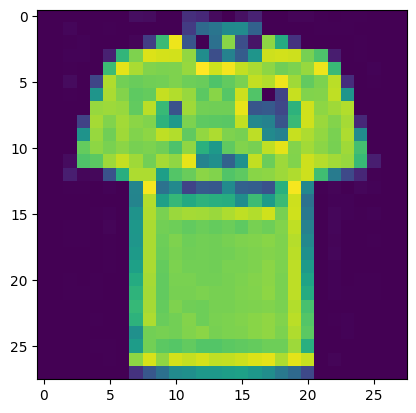

In [47]:
images = x_test.reshape(x_test.shape[0],28,28)
plt.imshow(images[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ankle-boots


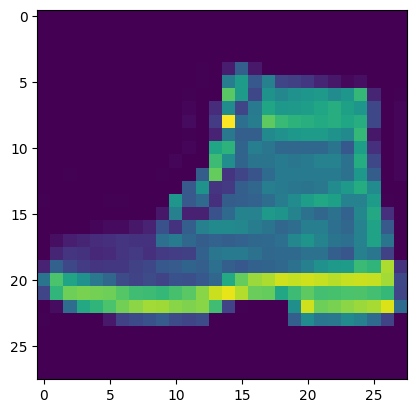

In [48]:
# predicting the class of images
class_labels = ['T-shirt/Tops', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle-boots']

n=np.random.randint(0,500)
plt.imshow(images[n])
predicted_values=model.predict(x_test)
print(class_labels[np.argmax(predicted_values[n])])

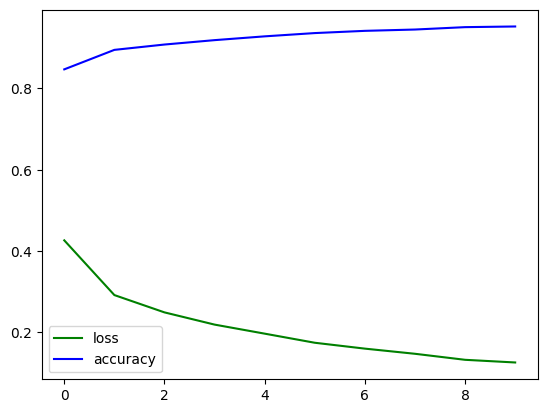

In [49]:
# PLOT THE TRAINING LOSS AND ACCURACY ->
plt.plot(hist.history['loss'],label='loss',color='g')
plt.plot(hist.history['accuracy'],label='accuracy',color='b')
plt.legend()
plt.show()